## **Initial Imports**

In [181]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **Loading the dataset**

In [183]:
df = pd.read_csv("HousingData.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### Feature Descriptions : ( As from Kaggle )

- **CRIM:** Per capita crime rate
- **ZN:** Proportion of residential land zoned for lots
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable
- **NOX:** Nitric oxides concentration
- **RM:** Average number of rooms
- **AGE:** Proportion of owner-occupied units built prior to 1940
- **DIS:** Distances to five Boston employment centres
- **RAD:** Index of accessibility to highways
- **TAX:** Full-value property-tax 
- **PTRATIO:** Pupil-teacher ratio 
- **B:** proportion of Black residents 
- **LSTAT:** Percentage of lower status of the population
- **MEDV:** Median value of owner-occupied homes in $1000's (TARGET VARIABLE)

In [184]:
df.shape


(506, 14)

In [185]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [186]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The data has null values which must be removed.

In [187]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']


### **Imputing the missing values**

In [188]:
# We use the KNN imputer to impute the missing values because it gave better results as compared with simple imputer

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)



X_KNN = imputer.fit_transform(X)
X_KNN = pd.DataFrame(X_KNN, columns=X.columns)


In [189]:
X_KNN.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

We don't have any null values now.

## **EDA**

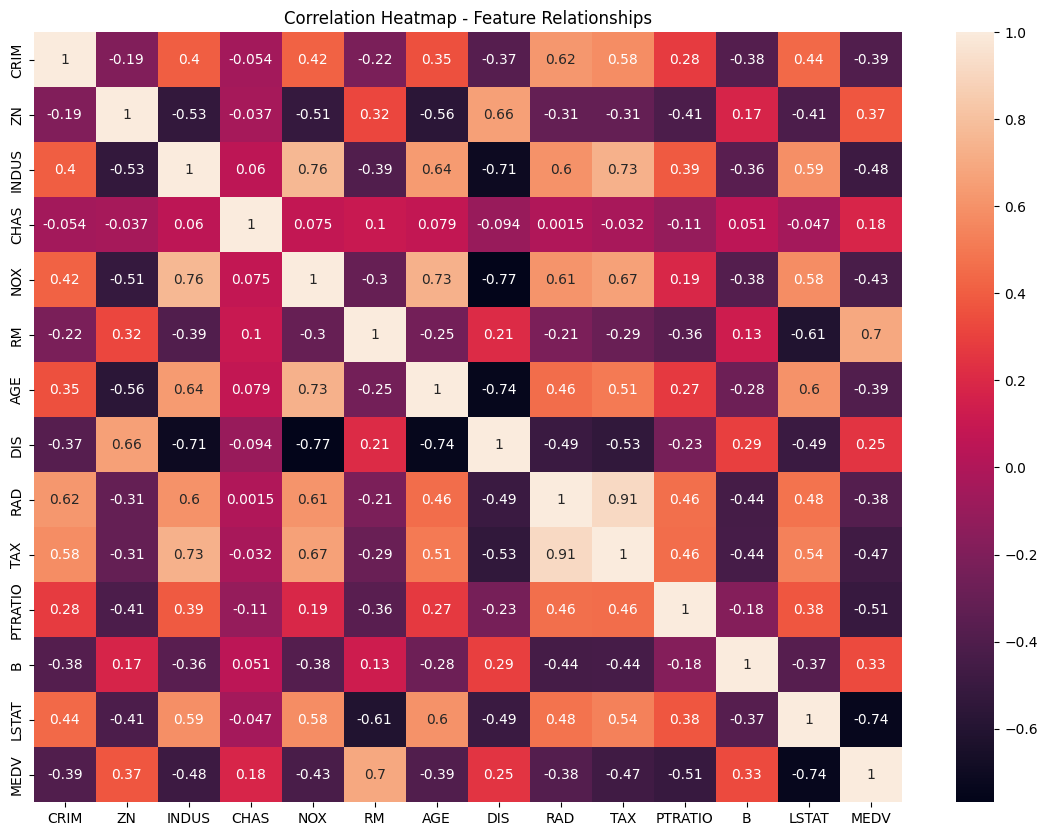

In [190]:
# Let's check the correlation of all the features among themselves
correlation_matrix = df.corr()

# Heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap - Feature Relationships')
plt.show()

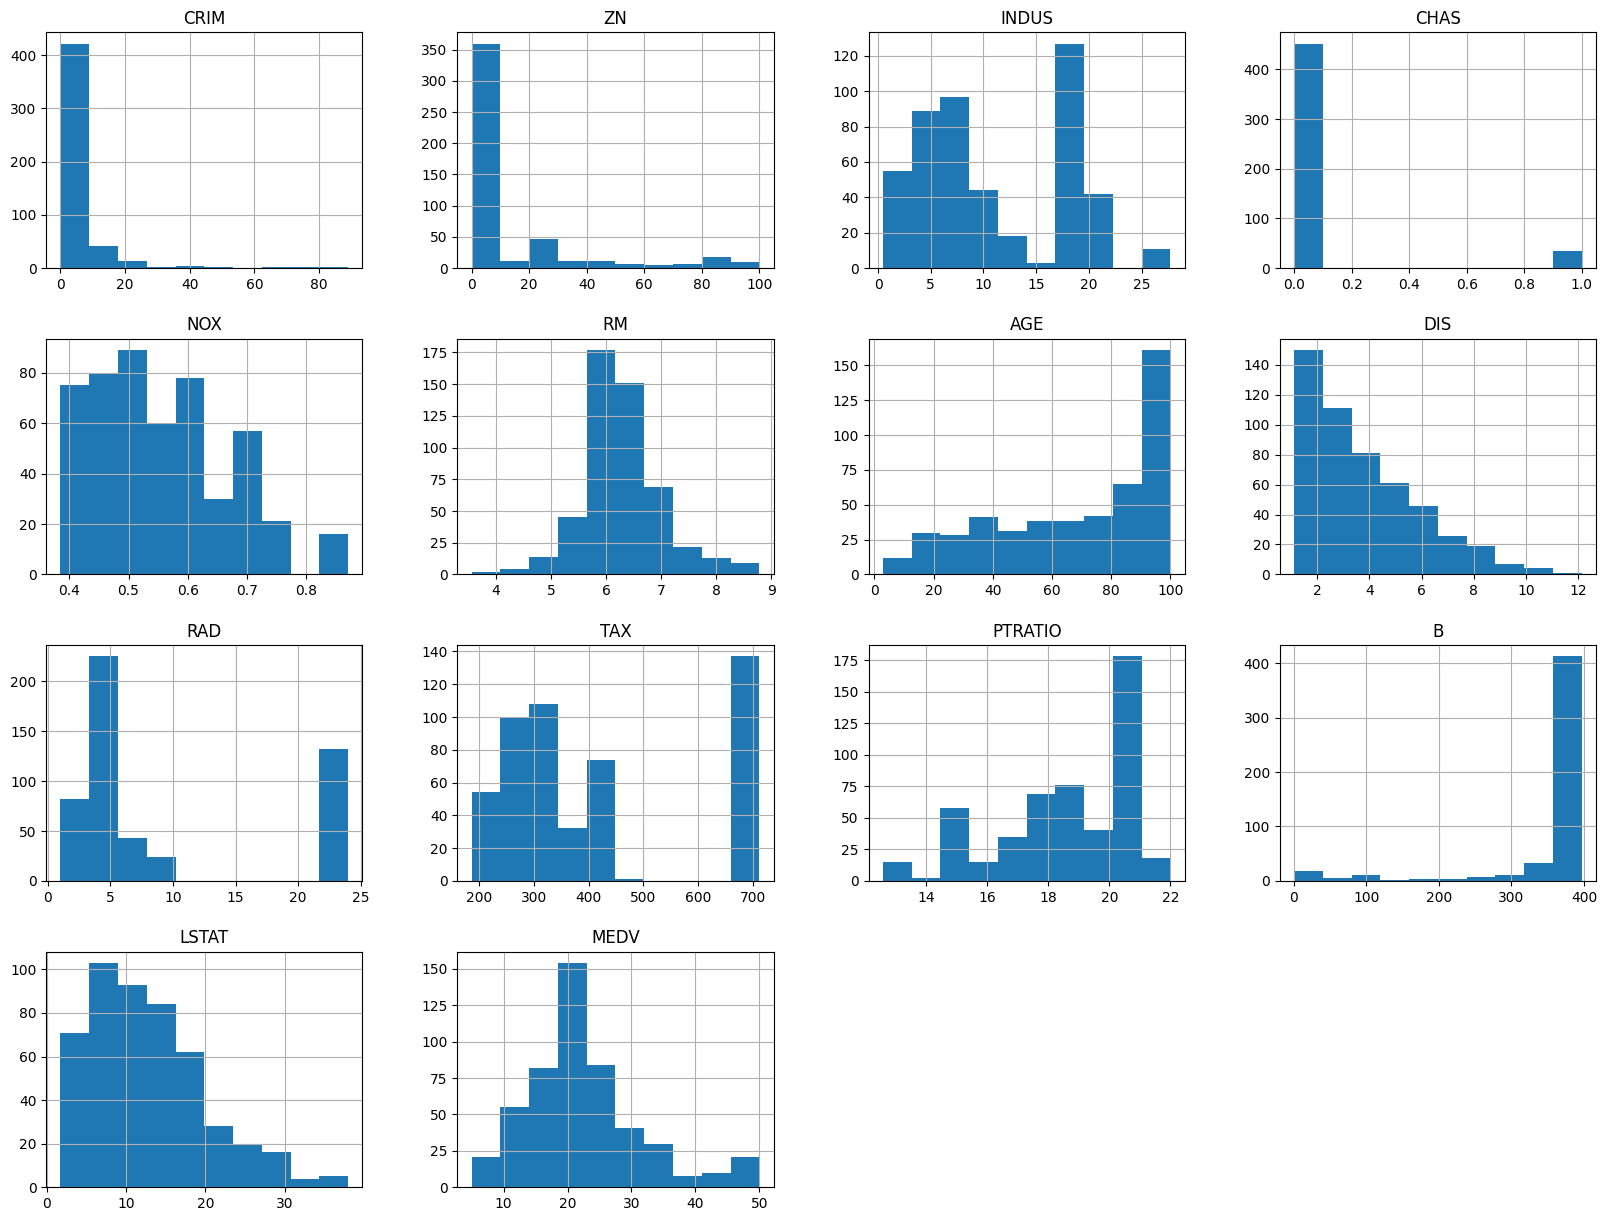

In [191]:
# Distribution of features

df.hist( figsize=(20,15))
plt.show()


## **Feature Engineering**

In [ ]:
# 1. Room to Age Ratio - newer houses with more rooms might be more valuable
X_KNN['RM_AGE_RATIO'] = X_KNN['RM'] / (X_KNN['AGE'] + 1)

# 3. Tax per room - how much tax per room
X_KNN['TAX_PER_ROOM'] = X_KNN['TAX'] / X_KNN['RM']

## **Train test split**

In [193]:

X_train, X_test, y_train, y_test = train_test_split(
    X_KNN, y, test_size=0.2, random_state=42
)

### **Scaling ( Normalizing the Data )**

In [194]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **Model Fitting**

In [195]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [196]:
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MSE: 17.33194935787766
RMSE: 4.163165785538411
R2 Score: 0.7636566857598714
